<a href="https://colab.research.google.com/github/KaiHuang05/LeetCode/blob/main/WIA1007_Assgn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 0. **Introduction**


## Dedication

We would like to extend our heartfelt gratitude to Dr. Muhammad Shahreeza Safiruz Kassim and Dr. Mohannad for the invaluable guidance and support throughout this assignment. Your insights, encouragement, and dedication have been instrumental in helping us enhance our understanding and achieve our objectives.

Thank you for inspiring us to strive for excellence and for making this learning journey a meaningful experience.

## APT Group Members



| Name | Matric No. |
| ---- | ---------- |
|      |            |
| CHENG KAI HUANG | 24066610 |
| ONG YEAN | 24004532 |
| NG ZHENG JIE |      |


# 1. **Data Collection**

## Importing Dataset from Google Drive

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/MyDrive/IDS_Dataset/card_transdata.csv')

Mounted at /content/drive


## Exploring the Dataset

After loading the dataset, visualize the first 5 rows of raw data to get a rough idea of what the dataset is all about.

In [ ]:
# Visualize the first 5 rows of raw data
df.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud,research_rate
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0,NaN
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0,NaN
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0,NaN
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0,NaN
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0,NaN


Evaluate the sufficiency of features, examples and samples in this dataset.

In [ ]:
# Visualize info such as data types and numbers of missing data
df.info()
# Obtain the decriptive statistic of the dataset (mean, standard deviation, quartiles, etc.)
df.describe().transpose()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 9 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   distance_from_home              999993 non-null  float64
 1   distance_from_last_transaction  999977 non-null  float64
 2   ratio_to_median_purchase_price  999981 non-null  float64
 3   repeat_retailer                 999998 non-null  float64
 4   used_chip                       999991 non-null  float64
 5   used_pin_number                 999987 non-null  float64
 6   online_order                    999990 non-null  float64
 7   fraud                           999993 non-null  float64
 8   research_rate                   32362 non-null   float64
dtypes: float64(9)
memory usage: 68.7 MB


,count,mean,std,min,25%,50%,75%,max
distance_from_home,999993.0,26.628789,65.390949,0.004874,3.878070,9.967734,25.743935,10632.723670
distance_from_last_transaction,999977.0,5.036557,25.843381,0.000118,0.296667,0.998636,3.355794,11851.104560
ratio_to_median_purchase_price,999981.0,1.824292,2.800030,0.004399,0.475665,0.997733,2.096381,267.802942
repeat_retailer,999998.0,0.881540,0.323152,0.000000,1.000000,1.000000,1.000000,1.000000
used_chip,999991.0,0.350397,0.477095,0.000000,0.000000,0.000000,1.000000,1.000000
used_pin_number,999987.0,0.100610,0.300812,0.000000,0.000000,0.000000,0.000000,1.000000
online_order,999990.0,0.650553,0.476796,0.000000,0.000000,1.000000,1.000000,1.000000
fraud,999993.0,0.087409,0.282433,0.000000,0.000000,0.000000,0.000000,1.000000
research_rate,32362.0,3.856560,0.976282,1.000000,3.000000,3.000000,5.000000,5.000000


In this dataset, there are 1,000,000 rows of observations (samples) with 9 columns. The huge number of samples is sufficient for further analysis. All the columns in this dataset are of `float64` data type and there are some missing values in every column.

# 2. **Data Preprocessing**

For this dataset, the target output is `fraud` (column **#7**) while columns **#0-#6** and **#8** are features.

## Data Cleaning

### Finding missing values

Find the number of missing values of every column by using `df.isna().sum()`. For example, there is 7 missing value found under column "distance_from_home".

In [ ]:
# Obtain the total number of missing values per column
df.isna().sum()

,0
distance_from_home,7
distance_from_last_transaction,23
ratio_to_median_purchase_price,19
repeat_retailer,2
used_chip,9
used_pin_number,13
online_order,10
fraud,7
research_rate,967638


### Dropping column with too many missing values

`df = df.drop(columns=['research_rate'])` is used to eliminate the column `research_rate` which consists of too many missing values. Additionally, this eliminated column represents the rate of the participants' satisfaction towards this research, so it is not meaningful to our further data analysis and machine learning models.

In [ ]:
df = df.drop(columns=['research_rate'])
df.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


### Dropping duplicate rows/samples

Find the duplicate rows by using `df.duplicated(keep='first')`. By setting `keep='first'`, the first occurrence of every duplicate rows is retained and not considered duplicate.

In [ ]:
# Find duplicate rows
duplicate_rows = df[df.duplicated(keep='first')]
duplicate_rows.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14 entries, 8 to 999999
Data columns (total 8 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   distance_from_home              14 non-null     float64
 1   distance_from_last_transaction  14 non-null     float64
 2   ratio_to_median_purchase_price  14 non-null     float64
 3   repeat_retailer                 14 non-null     float64
 4   used_chip                       14 non-null     float64
 5   used_pin_number                 14 non-null     float64
 6   online_order                    14 non-null     float64
 7   fraud                           14 non-null     float64
dtypes: float64(8)
memory usage: 1008.0 bytes


There are 14 duplicate samples that should be removed.

In [ ]:
# Drop all duplicate rows
df = df.drop_duplicates(keep='first')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 999986 entries, 0 to 999998
Data columns (total 8 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   distance_from_home              999979 non-null  float64
 1   distance_from_last_transaction  999963 non-null  float64
 2   ratio_to_median_purchase_price  999967 non-null  float64
 3   repeat_retailer                 999984 non-null  float64
 4   used_chip                       999977 non-null  float64
 5   used_pin_number                 999973 non-null  float64
 6   online_order                    999976 non-null  float64
 7   fraud                           999979 non-null  float64
dtypes: float64(8)
memory usage: 68.7 MB


After removing 14 duplicate rows, we now have 999,986 unique samples.

### Addressing missing values

Rows with missing values could negatively impact the model's accuracy later on. The problem can be addressed with different approach based on the number of missing fields of the row.

**Dropping rows with too many missing values**

In [ ]:
# Drop the row with at least 3 null values from DataFrame
df = df.dropna(thresh=3)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 999986 entries, 0 to 999998
Data columns (total 8 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   distance_from_home              999979 non-null  float64
 1   distance_from_last_transaction  999963 non-null  float64
 2   ratio_to_median_purchase_price  999967 non-null  float64
 3   repeat_retailer                 999984 non-null  float64
 4   used_chip                       999977 non-null  float64
 5   used_pin_number                 999973 non-null  float64
 6   online_order                    999976 non-null  float64
 7   fraud                           999979 non-null  float64
dtypes: float64(8)
memory usage: 68.7 MB


The code snippet `df = df.dropna(thresh=3)` drops rows with at least 3 null values. Since the original dataset contains only 9 columns, this approach is effective in minimizing the potential negative impact of incomplete data on the model's accuracy. By retaining rows with fewer missing values, we ensure the dataset remains as complete as possible while still addressing rows with substantial missing data.

However, the dataset does not contain rows with 3 or more missing values as the number of rows remains unchanged (999,986).

**Replacing null values**

To minimize the negative impact of the remaining null values in the samples on the model, replace the null values with the most frequent value (mode) in each sample. This ensures the dataset remains consistent while preserving the distribution of the data.

In [ ]:
from sklearn.impute import SimpleImputer

# Fill in missing values with the most frequent value (mode)
most_frequent_imputer = SimpleImputer(strategy='most_frequent')
df.iloc[:, :] = most_frequent_imputer.fit_transform(df)

df.isna().sum()

,0
distance_from_home,0
distance_from_last_transaction,0
ratio_to_median_purchase_price,0
repeat_retailer,0
used_chip,0
used_pin_number,0
online_order,0
fraud,0


### Addressing outliers

To find outliers, visualize the columns with boxplots first.

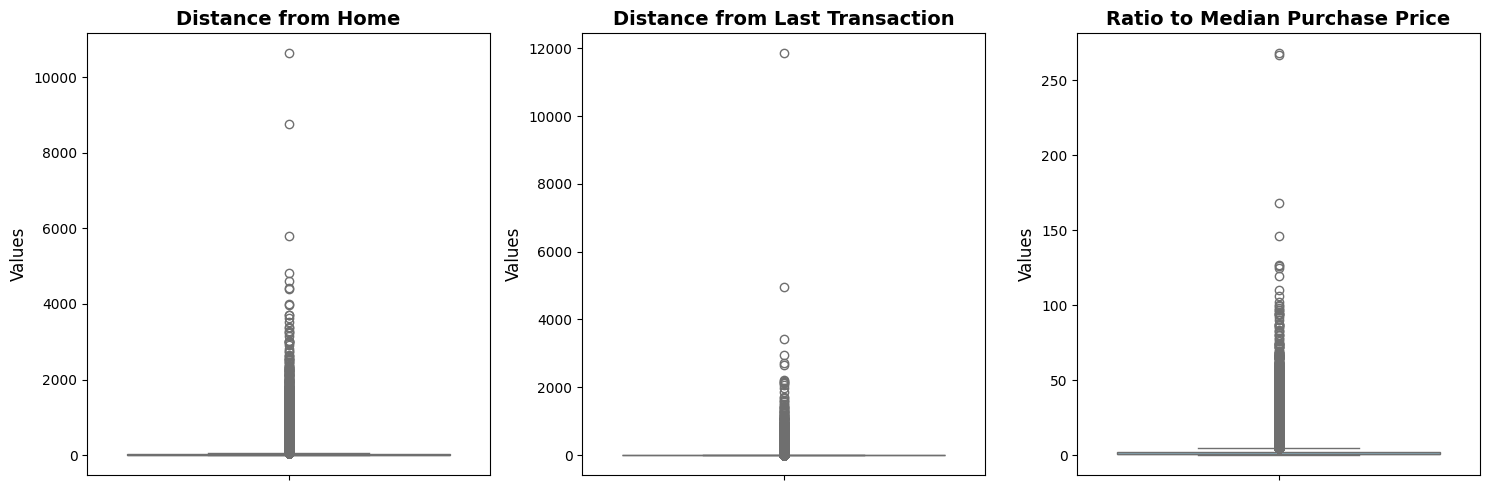

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# List of columns and titles
columns = ['distance_from_home', 'distance_from_last_transaction', 'ratio_to_median_purchase_price']
titles = ['Distance from Home', 'Distance from Last Transaction', 'Ratio to Median Purchase Price']

# Loop through the columns and axes to plot individual boxplots
for i, col in enumerate(columns):
    sns.boxplot(y=df[col], ax=axes[i], color="skyblue")  # Create the boxplot for each column
    axes[i].set_title(titles[i], fontsize=14, weight='bold')  # Set specific title for each subplot
    axes[i].set_ylabel('Values', fontsize=12)  # Set common y-axis label


# Adjust layout for better spacing
plt.tight_layout()
plt.show()

From the boxplots above, we can see that there are outliers in three features, hence outliers need to be removed before applying normalization on these three columns.

In [ ]:
# Define columns to clean
columns_to_clean = ['distance_from_home', 'distance_from_last_transaction', 'ratio_to_median_purchase_price']

# List of columns and titles
columns = ['distance_from_home', 'distance_from_last_transaction', 'ratio_to_median_purchase_price']
titles = ['Distance from Home', 'Distance from Last Transaction', 'Ratio to Median Purchase Price']

In [ ]:
df_min_max = df.copy()

## remove outlier before min max scaling

# Calculate the IQR for each column
Q1 = df_min_max[columns_to_clean].quantile(0.25)
Q3 = df_min_max[columns_to_clean].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outliers (1.5 times the IQR below Q1 or above Q3)
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers (values outside the defined bounds)
for col in columns_to_clean:
    df_min_max = df_min_max[(df_min_max[col] >= lower_bound[col]) & (df_min_max[col] <= upper_bound[col])]

After removing the outliers, we need to confirm it by visualizing the features with histograms and reading the lower and upper bounds after outlier removal.

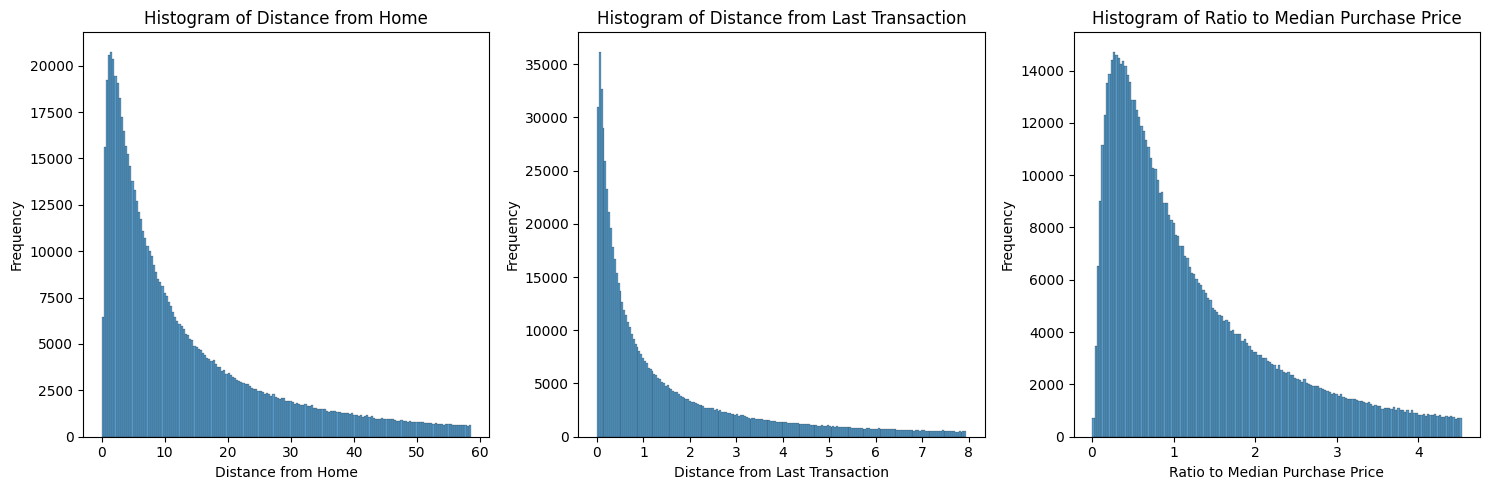

In [ ]:
fig, axes = plt.subplots(1,3,figsize=(15,5))

# List of columns and titles
for i, column in enumerate(columns_to_clean):
    # Create a histogram for each column in columns_to_clean using seaborn
    sns.histplot(df_min_max[column], ax = axes[i], kde=False)  # kde=False means no kernel density estimate is shown
    axes[i].set_title(f'Histogram of {titles[i]}')
    axes[i].set_xlabel(titles[i])
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

In [ ]:
for column in columns_to_clean:
    print(f'{column}\nThe lower bound is {lower_bound[column]}\nThe upper bound is {upper_bound[column]}\n')

distance_from_home
The lower bound is -28.920879786875
The upper bound is 58.542682176125

distance_from_last_transaction
The lower bound is -4.291907490624999
The upper bound is 7.9442262623749995

ratio_to_median_purchase_price
The lower bound is -1.9554577601250005
The upper bound is 4.527450648875001



From the histograms, we double-checked that the outliers are removed as there is no value larger than the upper bound or lower than the lower bound.

## Normalization

After data cleaning, the dataset should be ready for normalization, but before that let's confirm that there are no more null values.



> **WARNING!** This section is not yet fully documented. Please help doing so and you have my thanks.



In [ ]:
# Check whether if null values exist before applying normalization
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 999986 entries, 0 to 999998
Data columns (total 8 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   distance_from_home              999986 non-null  float64
 1   distance_from_last_transaction  999986 non-null  float64
 2   ratio_to_median_purchase_price  999986 non-null  float64
 3   repeat_retailer                 999986 non-null  float64
 4   used_chip                       999986 non-null  float64
 5   used_pin_number                 999986 non-null  float64
 6   online_order                    999986 non-null  float64
 7   fraud                           999986 non-null  float64
dtypes: float64(8)
memory usage: 68.7 MB


### Min-max scaler

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# normalize using min max scaler

# fit_transform function will return a 2d array ,flatten to convert it to 1d array then make sure the value is saved into
# dataframe as float type

for i in columns_to_clean:
  scaler = MinMaxScaler()
  df_min_max.loc[:,i] = scaler.fit_transform(df_min_max[[i]].values.astype(float)).flatten()

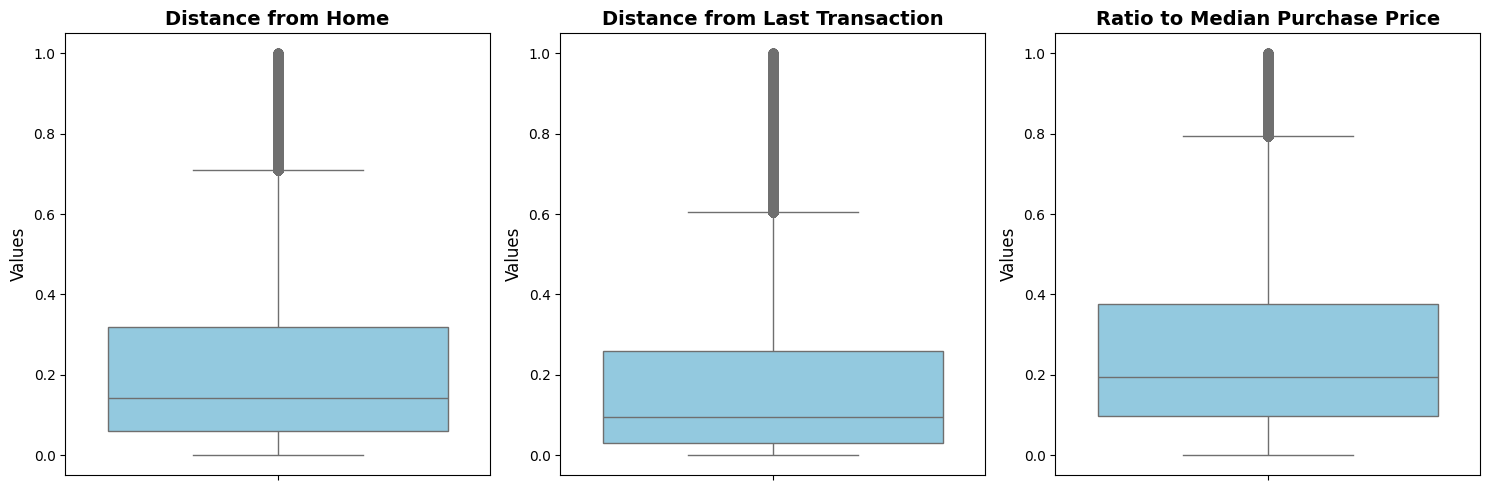

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))


# Loop through the columns and axes to plot individual boxplots
for i, col in enumerate(columns):
    sns.boxplot(y=df_min_max[col], ax=axes[i], color="skyblue")  # Create the boxplot for each column
    axes[i].set_title(titles[i], fontsize=14, weight='bold')  # Set specific title for each subplot
    axes[i].set_ylabel('Values', fontsize=12)  # Set common y-axis label


# Adjust layout for better spacing
plt.tight_layout()
plt.show()

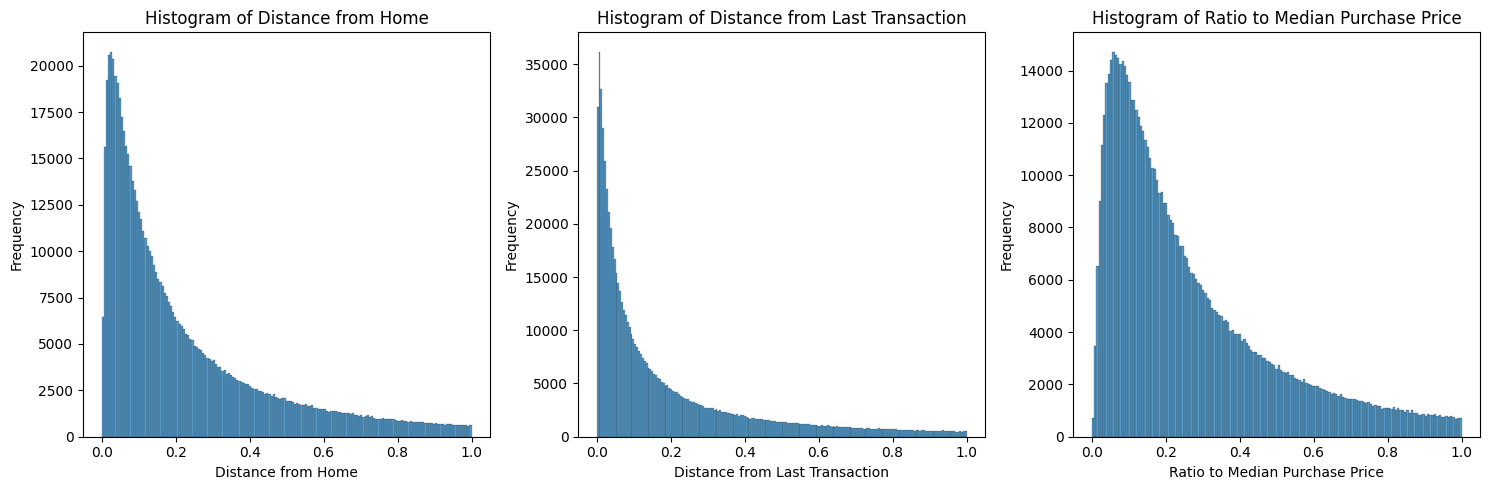

In [ ]:
fig ,axes = plt.subplots(1,3,figsize=(15,5))

# List of columns and titles
for i,column in enumerate(columns_to_clean):
    # Create a histogram for each column in columns_to_clean using seaborn
    sns.histplot(df_min_max[column],ax = axes[i], kde=False)  # kde=False means no kernel density estimate is shown
    axes[i].set_title(f'Histogram of {titles[i]}')
    axes[i].set_xlabel(titles[i])
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

From the visualization above ,we can notice that all the values is set between 0 to 1 ,outliers removed

### Z-score

In [ ]:
from sklearn.preprocessing import StandardScaler
from scipy.stats import zscore

df_zscore = df.copy()

# define a threshold and remove data that has zscore higher than this value
threshold = 3

In [ ]:
# normalize using zscore
for i in columns_to_clean:
  scaler = StandardScaler()
  df_zscore.loc[:,i] = scaler.fit_transform(df_zscore[[i]].values.astype(float)).flatten()

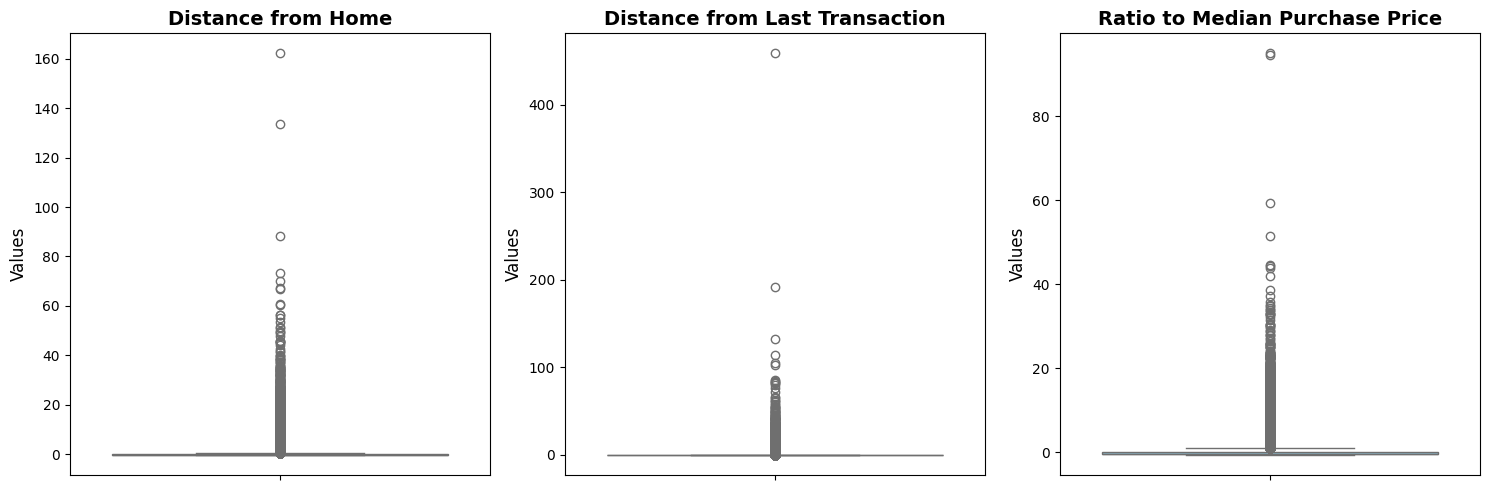

In [ ]:
fig , axes = plt.subplots(1,3,figsize=(15,5))

for i ,col in enumerate(columns):
  sns.boxplot(y=df_zscore[col],ax = axes[i],color = 'skyblue')
  axes[i].set_title(titles[i],fontsize = 14,weight = 'bold')
  axes[i].set_ylabel('Values',fontsize = 12)

plt.tight_layout()
plt.show()

In [ ]:
# remove outliers larger than threshold or smaller than threshold
for i in columns_to_clean:
  df_zscore = df_zscore[np.abs(df_zscore.loc[:,i]) <= threshold]

df_zscore.info()

<class 'pandas.core.frame.DataFrame'>
Index: 962929 entries, 0 to 999998
Data columns (total 8 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   distance_from_home              962929 non-null  float64
 1   distance_from_last_transaction  962929 non-null  float64
 2   ratio_to_median_purchase_price  962929 non-null  float64
 3   repeat_retailer                 962929 non-null  float64
 4   used_chip                       962929 non-null  float64
 5   used_pin_number                 962929 non-null  float64
 6   online_order                    962929 non-null  float64
 7   fraud                           962929 non-null  float64
dtypes: float64(8)
memory usage: 66.1 MB


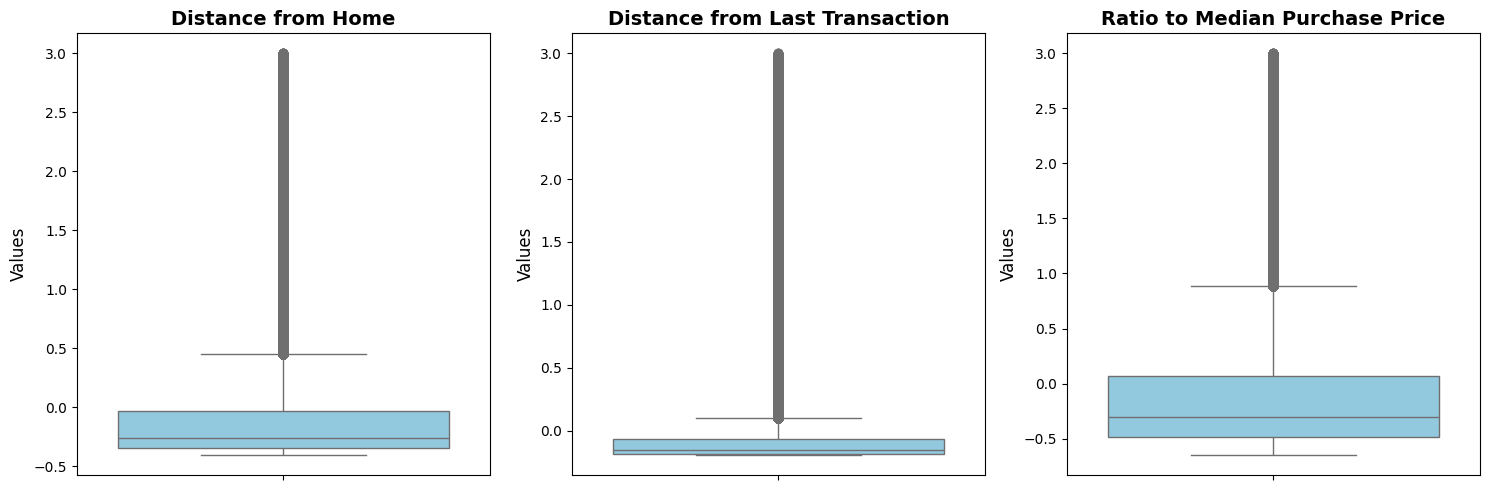

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# List of columns and titles
columns = ['distance_from_home', 'distance_from_last_transaction', 'ratio_to_median_purchase_price']
titles = ['Distance from Home', 'Distance from Last Transaction', 'Ratio to Median Purchase Price']

# Loop through the columns and axes to plot individual boxplots
for i, col in enumerate(columns):
    sns.boxplot(y=df_zscore[col], ax=axes[i], color="skyblue")  # Create the boxplot for each column
    axes[i].set_title(titles[i], fontsize=14, weight='bold')  # Set specific title for each subplot
    axes[i].set_ylabel('Values', fontsize=12)  # Set common y-axis label


# Adjust layout for better spacing
plt.tight_layout()
plt.show()

From figure above,we double checked outliers are removed

### Decimal scaling

In [ ]:
# Make a copy of the dataframe to work on
df_decimal_scaled = df.copy()

# Define the columns to normalize
columns_to_normalize = ['distance_from_home', 'distance_from_last_transaction', 'ratio_to_median_purchase_price']

In [ ]:
# Normalize each column using decimal scaling
for col in columns_to_normalize:
    max_abs_value = df_decimal_scaled[col].abs().max()
    if max_abs_value != 0:  # Avoid division by zero
        j = len(str(int(max_abs_value)))  # Number of digits in the max absolute value
        df_decimal_scaled[col] = df_decimal_scaled[col] / (10 ** j)

In [ ]:
# Print the first few rows of the normalized data
print(df_decimal_scaled.head())

# Display dataset info
df_decimal_scaled.info()


   distance_from_home  distance_from_last_transaction  \
0            0.000579                        0.000003   
1            0.000108                        0.000002   
2            0.000051                        0.000008   
3            0.000022                        0.000056   
4            0.000442                        0.000006   

   ratio_to_median_purchase_price  repeat_retailer  used_chip  \
0                        0.001946              1.0        1.0   
1                        0.001294              1.0        0.0   
2                        0.000428              1.0        0.0   
3                        0.000363              1.0        1.0   
4                        0.002223              1.0        1.0   

   used_pin_number  online_order  fraud  
0              0.0           0.0    0.0  
1              0.0           0.0    0.0  
2              0.0           1.0    0.0  
3              0.0           1.0    0.0  
4              0.0           1.0    0.0  
<class 'pandas

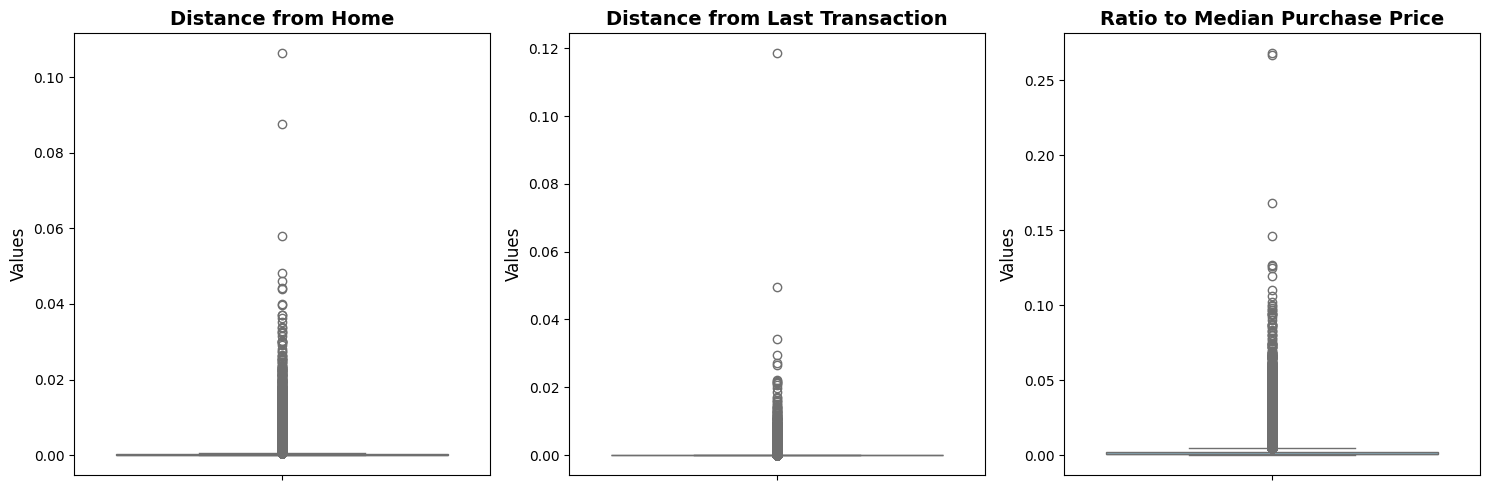

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize the normalized data using boxplots
fig, axes = plt.subplots(1, len(columns_to_normalize), figsize=(15, 5))
titles = ['Distance from Home', 'Distance from Last Transaction', 'Ratio to Median Purchase Price']

for i, col in enumerate(columns_to_normalize):
    sns.boxplot(y=df_decimal_scaled[col], ax=axes[i], color='skyblue')
    axes[i].set_title(titles[i], fontsize=14, weight='bold')
    axes[i].set_ylabel('Values', fontsize=12)

plt.tight_layout()
plt.show()


### Max absolute scaling

In [ ]:
from sklearn.preprocessing import MaxAbsScaler

# Make a copy of the dataframe
df_max_abs_scaled = df.copy()

# Define the columns to normalize
columns_to_normalize = ['distance_from_home', 'distance_from_last_transaction', 'ratio_to_median_purchase_price']

In [ ]:
# Normalize each column using max absolute scaling
for col in columns_to_normalize:
    max_abs_value = df_max_abs_scaled[col].abs().max()
    if max_abs_value != 0:  # Avoid division by zero
        df_max_abs_scaled[col] = df_max_abs_scaled[col] / max_abs_value

In [ ]:
# Display dataset info
df_max_abs_scaled.info()

<class 'pandas.core.frame.DataFrame'>
Index: 999986 entries, 0 to 999998
Data columns (total 8 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   distance_from_home              999986 non-null  float64
 1   distance_from_last_transaction  999986 non-null  float64
 2   ratio_to_median_purchase_price  999986 non-null  float64
 3   repeat_retailer                 999986 non-null  float64
 4   used_chip                       999986 non-null  float64
 5   used_pin_number                 999986 non-null  float64
 6   online_order                    999986 non-null  float64
 7   fraud                           999986 non-null  float64
dtypes: float64(8)
memory usage: 68.7 MB


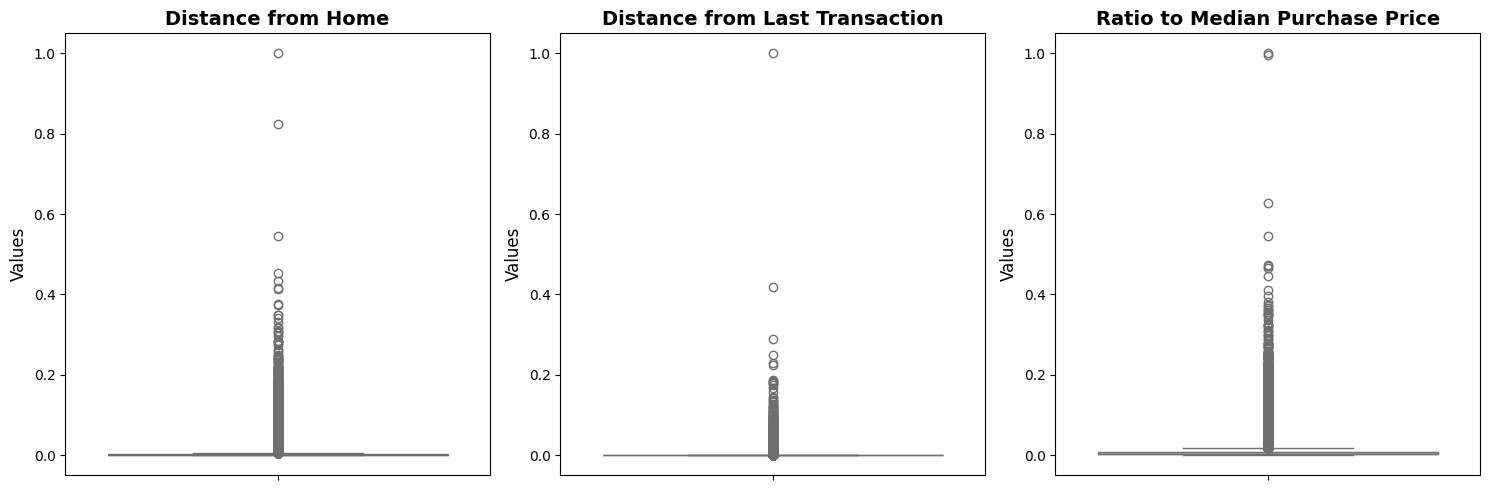

In [ ]:
# Visualize the normalized data using boxplots
fig, axes = plt.subplots(1, len(columns_to_normalize), figsize=(15, 5))
titles = ['Distance from Home', 'Distance from Last Transaction', 'Ratio to Median Purchase Price']

for i, col in enumerate(columns_to_normalize):
    sns.boxplot(y=df_max_abs_scaled[col], ax=axes[i], color='skyblue')
    axes[i].set_title(titles[i], fontsize=14, weight='bold')
    axes[i].set_ylabel('Values', fontsize=12)

plt.tight_layout()
plt.show()


### Robust normalization

In [ ]:
from sklearn.preprocessing import RobustScaler

# Create a copy of your dataframe
df_robust = df.copy()

In [ ]:
# List of columns to clean
columns_to_clean = ['distance_from_home', 'distance_from_last_transaction', 'ratio_to_median_purchase_price']

# Apply RobustScaler to each column
for i in columns_to_clean:
    scaler = RobustScaler()
    df_robust.loc[:, i] = scaler.fit_transform(df_robust[[i]].values.astype(float)).flatten()


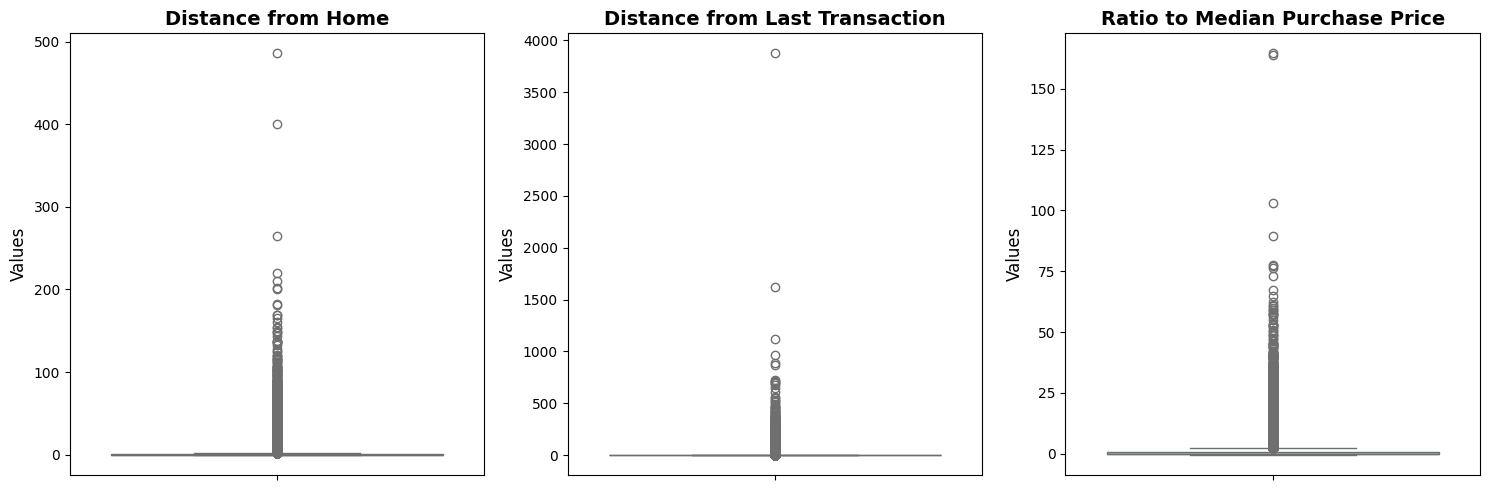

In [ ]:
# Plot boxplots after applying Robust Scaling
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Titles for the subplots
titles = ['Distance from Home', 'Distance from Last Transaction', 'Ratio to Median Purchase Price']

# Loop through the columns and axes to plot individual boxplots after scaling
for i, col in enumerate(columns_to_clean):
    sns.boxplot(y=df_robust[col], ax=axes[i], color="skyblue")  # Create the boxplot for each column
    axes[i].set_title(titles[i], fontsize=14, weight='bold')  # Set specific title for each subplot
    axes[i].set_ylabel('Values', fontsize=12)  # Set common y-axis label

# Adjust layout for better spacing
plt.tight_layout()
plt.show()


In [ ]:
# Remove outliers based on a threshold (e.g., 3 for robust scaling)
threshold = 3
for i in columns_to_clean:
    df_robust = df_robust[np.abs(df_robust[i]) <= threshold]

# Check the info of the cleaned dataframe
df_robust.info()


<class 'pandas.core.frame.DataFrame'>
Index: 790090 entries, 0 to 999998
Data columns (total 8 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   distance_from_home              790090 non-null  float64
 1   distance_from_last_transaction  790090 non-null  float64
 2   ratio_to_median_purchase_price  790090 non-null  float64
 3   repeat_retailer                 790090 non-null  float64
 4   used_chip                       790090 non-null  float64
 5   used_pin_number                 790090 non-null  float64
 6   online_order                    790090 non-null  float64
 7   fraud                           790090 non-null  float64
dtypes: float64(8)
memory usage: 54.3 MB


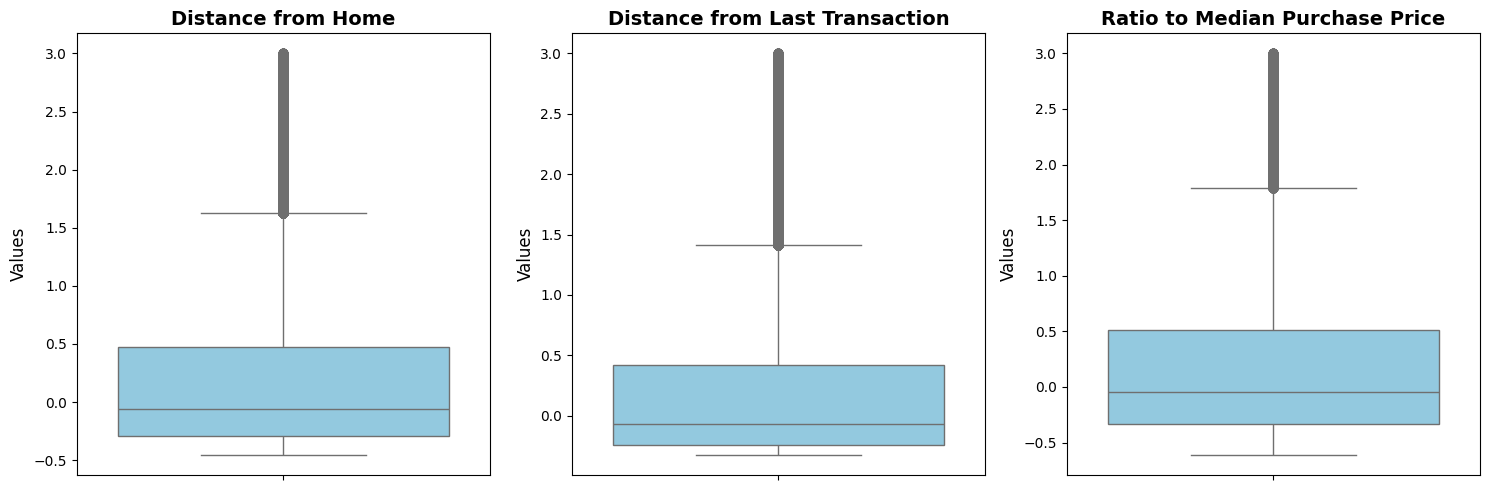

In [ ]:
# Plot boxplots after removing outliers
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for i, col in enumerate(columns_to_clean):
    sns.boxplot(y=df_robust[col], ax=axes[i], color="skyblue")  # Create the boxplot for each column
    axes[i].set_title(titles[i], fontsize=14, weight='bold')  # Set specific title for each subplot
    axes[i].set_ylabel('Values', fontsize=12)  # Set common y-axis label

plt.tight_layout()
plt.show()


### Unit vector normalization



In [ ]:
from sklearn.preprocessing import normalize

# Apply unit vector normalization (L2 normalization) to the selected columns
columns_to_normalize = ['distance_from_home', 'distance_from_last_transaction', 'ratio_to_median_purchase_price']
df_normalized = df.copy()

# Apply normalization to each column
df_normalized[columns_to_normalize] = normalize(df[columns_to_normalize])

# Print the normalized dataframe
print(df_normalized)

        distance_from_home  distance_from_last_transaction  \
0                 0.999421                        0.005373   
1                 0.992806                        0.016097   
2                 0.984341                        0.155673   
3                 0.371798                        0.926373   
4                 0.998656                        0.012802   
...                    ...                             ...   
999994            0.804288                        0.041051   
999995            0.981627                        0.132573   
999996            0.890567                        0.449945   
999997            0.992235                        0.056389   
999998            0.999963                        0.005474   

        ratio_to_median_purchase_price  repeat_retailer  used_chip  \
0                             0.033602              1.0        1.0   
1                             0.118644              1.0        0.0   
2                             0.082697       

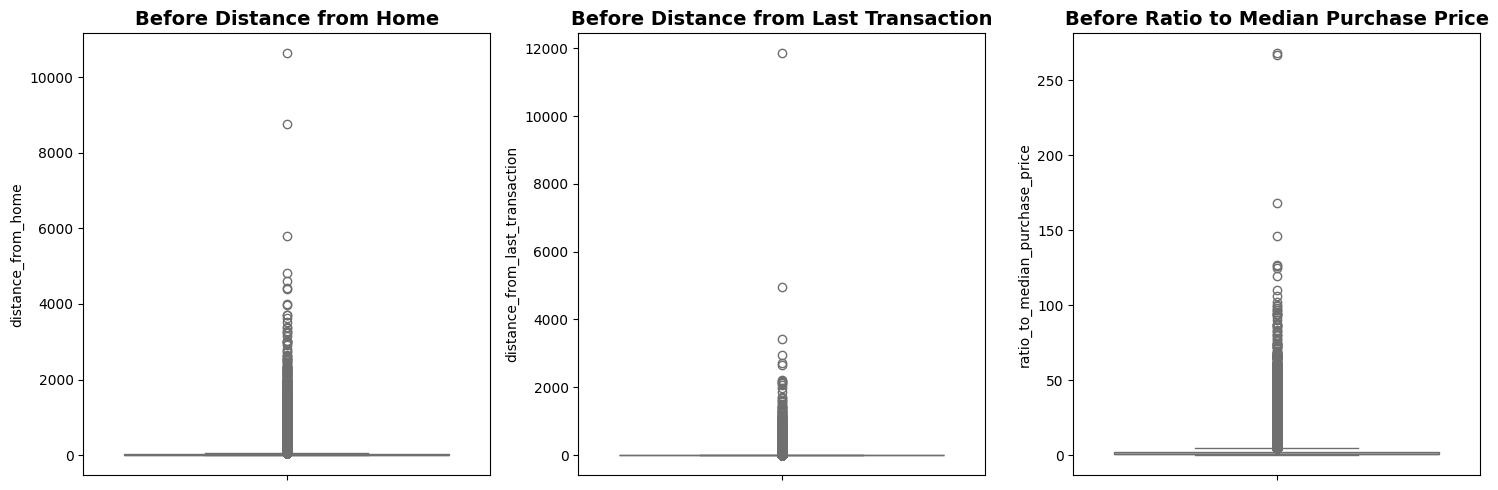

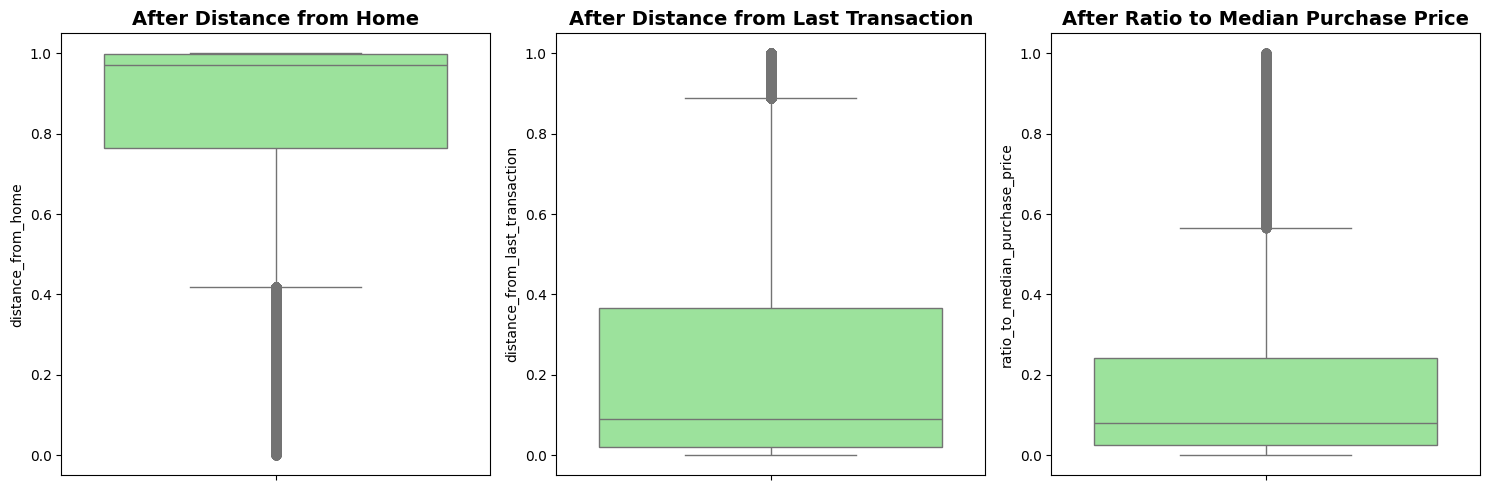

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot boxplots before and after unit vector normalization
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# List of titles for the subplots
titles = ['Distance from Home', 'Distance from Last Transaction', 'Ratio to Median Purchase Price']

# Plot before normalization
for i, col in enumerate(columns_to_normalize):
    sns.boxplot(y=df[col], ax=axes[i], color='skyblue')
    axes[i].set_title(f'Before {titles[i]}', fontsize=14, weight='bold')

plt.tight_layout()
plt.show()

# Plot after normalization
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for i, col in enumerate(columns_to_normalize):
    sns.boxplot(y=df_normalized[col], ax=axes[i], color='lightgreen')
    axes[i].set_title(f'After {titles[i]}', fontsize=14, weight='bold')

plt.tight_layout()
plt.show()


## Transformation

In [ ]:
# Rename all the variable name in each column for better visualisation after all Data Processing is completed
df.rename(columns = {'distance_from_home' : 'Distance from Home' },inplace = True)
df.rename(columns = {'distance_from_last_transaction' : 'Distance from Last Transaction' },inplace = True)
df.rename(columns = {'ratio_to_median_purchase_price' : 'Ratio to Median Purchase Price' },inplace = True)
df.rename(columns = {'repeat_retailer' : 'Repeat Retailer' },inplace = True)
df.rename(columns = {'used_chip' : 'Used Chip' },inplace = True)
df.rename(columns = {'used_pin_number' : 'Used Pin Number' },inplace = True)
df.rename(columns = {'online_order' : 'Online Order' },inplace = True)
df.head()

,Distance from Home,Distance from Last Transaction,Ratio to Median Purchase Price,Repeat Retailer,Used Chip,Used Pin Number,Online Order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


The variable names are modified for better readability.

# 3. **Exploratory Data Analysis (EDA)**

## Handle Imbalance Data

In [ ]:
# Create a pie chart using plotly
import plotly.express as px

# Define the labels for the pie chart
labels=["Genuine","Fraud"]

# Count the number of each class in the "Class" column of the DataFrame, and convert the counts to a list
fraud_or_not = df['fraud'].value_counts().tolist()
# Create a list of the counts of genuine and fraudulent transactions
values = [fraud_or_not[0], fraud_or_not[1]]
print(values);

print("Genuine:", values[0]);
print("Fraud:", values[1]);

# The 'values' parameter is set to the count of each class in the 'fraud' column of the DataFrame
# The 'names' parameter is set to the labels list
# The 'width' and 'height' parameters set the size of the chart
# The 'color_discrete_sequence' parameter sets the colors of the pie slices
# The 'title' parameter sets the title of the chart

fig = px.pie(values= df['fraud'].value_counts(), names=labels , width=700, height=400, color_discrete_sequence=["skyblue","black"]
             ,title="Fraud vs Genuine transactions")
# Display the pie chart
fig.show()

[912583, 87403]
Genuine: 912583
Fraud: 87403


Imbalanced data in machine learning means that some classes have way more examples than others. This can lead to problems like:

**Bias:** The model learns to favor the majority class, ignoring the minority class.

**Poor performance:** The model might seem accurate overall, but it struggles with the minority class.

**Missed insights:** Important information about the minority class might be lost.

**Unreliable results:** The model's predictions might be inaccurate and unreliable.

In [ ]:
!pip install -U imbalanced-learn

In [ ]:
#Create a copy of the original DataFrame
X = df.copy()

#Separate the 'Fraud' from features and store in y.
y = X.pop('fraud')

from imblearn.combine import SMOTEENN

# Create an instance of SMOTEENN with a specified random state
# Apply SMOTEENN resampling to both features (X) and the target variable (y)
X, y = SMOTEENN(random_state=250107).fit_resample(X, y)

In [ ]:
# Define the labels for the pie chart
labels=["Genuine","Fraud"]

# Count the number of each class in the "Class" column of the DataFrame, and convert the counts to a list
fraud_or_not = y.value_counts().tolist()
# Create a list of the counts of genuine and fraudulent transactions
values = [fraud_or_not[0], fraud_or_not[1]]
print(values);

print("Genuine:", values[0]);
print("Fraud:", values[1]);

fig = px.pie(values= y.value_counts(), names=labels , width=700, height=400, color_discrete_sequence=["skyblue","black"]
             ,title="Fraud vs Genuine transactions")
# Display the pie chart
fig.show()

[910922, 890059]
Genuine: 910922
Fraud: 890059


There are several benefits to using SMOTE for dealing with imbalanced datasets:

**Improved model performance:** SMOTE helps to balance the class distribution of the dataset, which can improve the performance of machine learning models.

**Reduced risk of overfitting:** By generating new synthetic samples, instead of simply duplicating existing samples, SMOTE can help to reduce the risk of overfitting which commonly accompanies random oversampling.


Referrence for Impact of Imbalanced Data: https://isi-web.org/sites/default/files/2024-02/Handling-Data-Imbalance-in-Machine-Learning.pdf.

## Data Integration

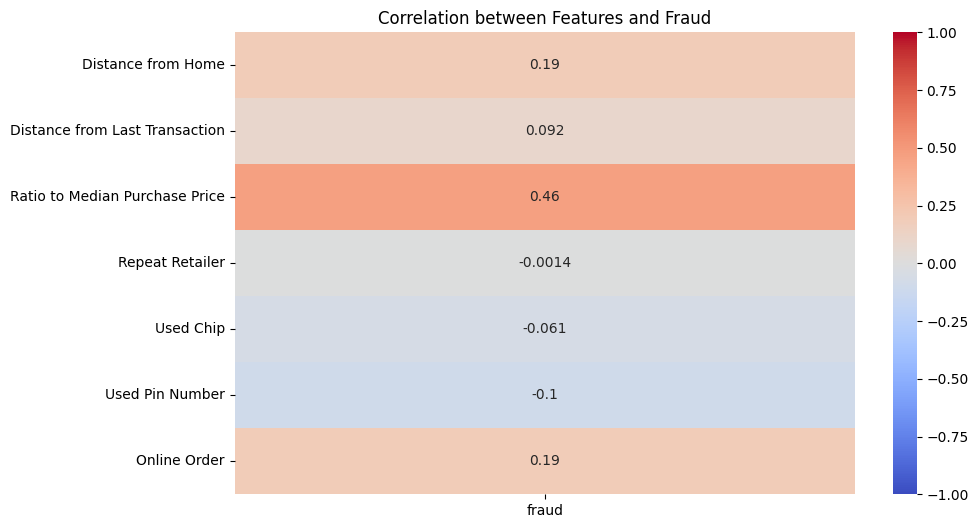

In [ ]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Filter for correlations with the 'fraud' column
fraud_correlations = correlation_matrix['fraud'].drop('fraud')  # Remove self-correlation

# Create a heatmap to visualize the correlations
plt.figure(figsize=(10, 6))
sns.heatmap(fraud_correlations.to_frame(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation between Features and Fraud')
plt.show()



*   Correlation values closed to -1 and 1 indicates a strong correlation between specific feature and target 'fraud'.


*   Correlation values closed to 0 indicates a weak correlation between specific feature and target 'fraud'.

Based on the data allocated, that is unnecessary to drop any column of dataset. Since the correlated values aren't too high or too low.





Referrence for Data Correlation : https://datascience.stackexchange.com/questions/36404/when-to-remove-correlated-variables#:~:text=If%20all%20you%20are%20concerned,if%20the%20correlation%20is%20mild.



> If all you are concerned with is performance, then it makes no sense to remove two correlated variables, unless correlation=1 or -1, in which case one of the variables is redundant.

> But if are concerned about interpretability then it might make sense to remove one of the variables, even if the correlation is mild. This is particularly true for linear models. One of the assumptions of the linear regression is lack of perfect multicollinearity in the predictors.

> If A is correlated with B, then you cannot interpret the coefficients of neither A nor B. To see why, imagine the extreme case when A=B (perfect correlation). Then, the model y=100*A+50*B is the same as the model y=5*A+10*B or y=-2000*A+4000*B. There are multiple equilibra in the possible solutions to the least square minimzation problem therefore you cannot "trust" neither.

> Similar things can happen with other models. For example, if A is very correlated with B, then if the decision tree chooses A double the times as B, then you cannot say that A is more important than B. If you retrain the model, the opposite could have happened.



# 3. **Model Selection**
Once your data is ready, you will need to choose an appropriate machine learning algorithm for your project. You may choose from supervised or unsupervised learning, and select the model based on the problem you are trying to solve.

## Trying out multiple Machine Learning Models

If module is missing, run this code:

In [ ]:
!pip install xgboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.9/153.9 MB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 201.3/201.3 MB 5.3 MB/s eta 0:00:00


**Determining Best Model**
We have decided to use the Accuracy and Root Mean Squared Error (RMSE) to measure our model performance.

Now we will train our data against multiple classification models to test which gives us the best performance.

Below are the chosen Machine Learning classification models to test for this project :

- Decision Tree Classifier
- Random Forest Classifier
- XGBoost
- GaussianNB

We will train each models with 6 different normalization techniques applied to the original dataset to compare and evaluate their performances based on the Accuracy and Root Mean Squared Error.

Below is the code to train our data against different classification models to help us find out which classification models perform best based on the 'Accuracy' and 'Root-mean-square deviation(RMSE)' calculated.

In [ ]:
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

xgb_model = XGBClassifier()
dt_model = DecisionTreeClassifier()
rf_model = RandomForestClassifier()
nb_model = GaussianNB()

Preparing to store the evaluation metrics

In [ ]:
from sklearn.model_selection import train_test_split

dfs = [
    df_min_max,
    df_zscore,
    df_decimal_scaled,
    df_max_abs_scaled,
    df_robust,
    df_normalized
]
normal_names = [
    'Min-max',
    'Z-score',
    'Decimal scaling',
    'Max absolute scaling',
    'Robust normalization',
    'Unit vector normalization'
]

metrics = {
    'ModelName': ['XGBoost_MinMax',
                  'XGBoost_ZScore',
                  'XGBoost_DecimalScaling',
                  'XGBoost_MaxAbsScaling',
                  'XGBoost_RobustNorm',
                  'XGBoost_UnitVecNorm',
                  'DecisionTree_MinMax',
                  'DecisionTree_ZScore',
                  'DecisionTree_DecimalScaling',
                  'DecisionTree_MaxAbsScaling',
                  'DecisionTree_RobustNorm',
                  'DecisionTree_UnitVecNorm',
                  'RandomForest_MinMax',
                  'RandomForest_ZScore',
                  'RandomForest_DecimalScaling',
                  'RandomForest_MaxAbsScaling',
                  'RandomForest_RobustNorm',
                  'RandomForest_UnitVecNorm',
                  'GaussianNB_MinMax',
                  'GaussianNB_ZScore',
                  'GaussianNB_DecimalScaling',
                  'GaussianNB_MaxAbsScaling',
                  'GaussianNB_RobustNorm',
                  'GaussianNB_UnitVecNorm',],
    'Accuracy': [],
    'RMSE': [],
}

## Training and evaluating the accuracy of Machine Learning Model

We also split the dataset into two parts, the TrainData, and the Test Data.

The TrainData consists of 80% of the original dataset while the TestData consists of 20% of the original dataset. The model will then be trained on the TrainData and evaluated on the TestData.

This is done to ensure that we are not falsely evaluating our model since the model might overfit on the training data. Using a TestData that the model has never seen before for evaluation allow us to evaluate how well the model generalizes with the dataset.

In [ ]:
from sklearn.metrics import accuracy_score, mean_squared_error

### XGBoost

In [ ]:
# Training XGBoost on 6 normalization techniques and evaluate their performances
for i in range(len(dfs)):
    X = dfs[i].copy()
    y = X.pop('fraud')

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    xgb_model.fit(X_train, y_train)
    y_pred = xgb_model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))

    metrics['Accuracy'].append(acc)
    metrics['RMSE'].append(rmse)

### Decision Tree

In [ ]:
# Training DecisionTree on 6 normalization techniques and evaluate their performances
print('Accuracy:')
for i in range(len(dfs)):
    X = dfs[i].copy()
    y = X.pop('fraud')

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    dt_model.fit(X_train, y_train)
    y_pred = dt_model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))

    metrics['Accuracy'].append(acc)
    metrics['RMSE'].append(rmse)

Accuracy:


### Random Forest

In [ ]:
# Training RandomForest on 6 normalization techniques and evaluate their performances
for i in range(len(dfs)):
    X = dfs[i].copy()
    y = X.pop('fraud')

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    rf_model.fit(X_train, y_train)
    y_pred = rf_model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))

    metrics['Accuracy'].append(acc)
    metrics['RMSE'].append(rmse)

### Gaussion NB

In [ ]:
# Training GaussianNB on 6 normalization techniques and evaluate their performances
for i in range(len(dfs)):
    X = dfs[i].copy()
    y = X.pop('fraud')

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    nb_model.fit(X_train, y_train)
    y_pred = nb_model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))

    metrics['Accuracy'].append(acc)
    metrics['RMSE'].append(rmse)

After training all 4 models with 6 different normalization techniques, their performance which are evaluated by Accuracy and RMSE can be plotted out in a table to select the best performing model.

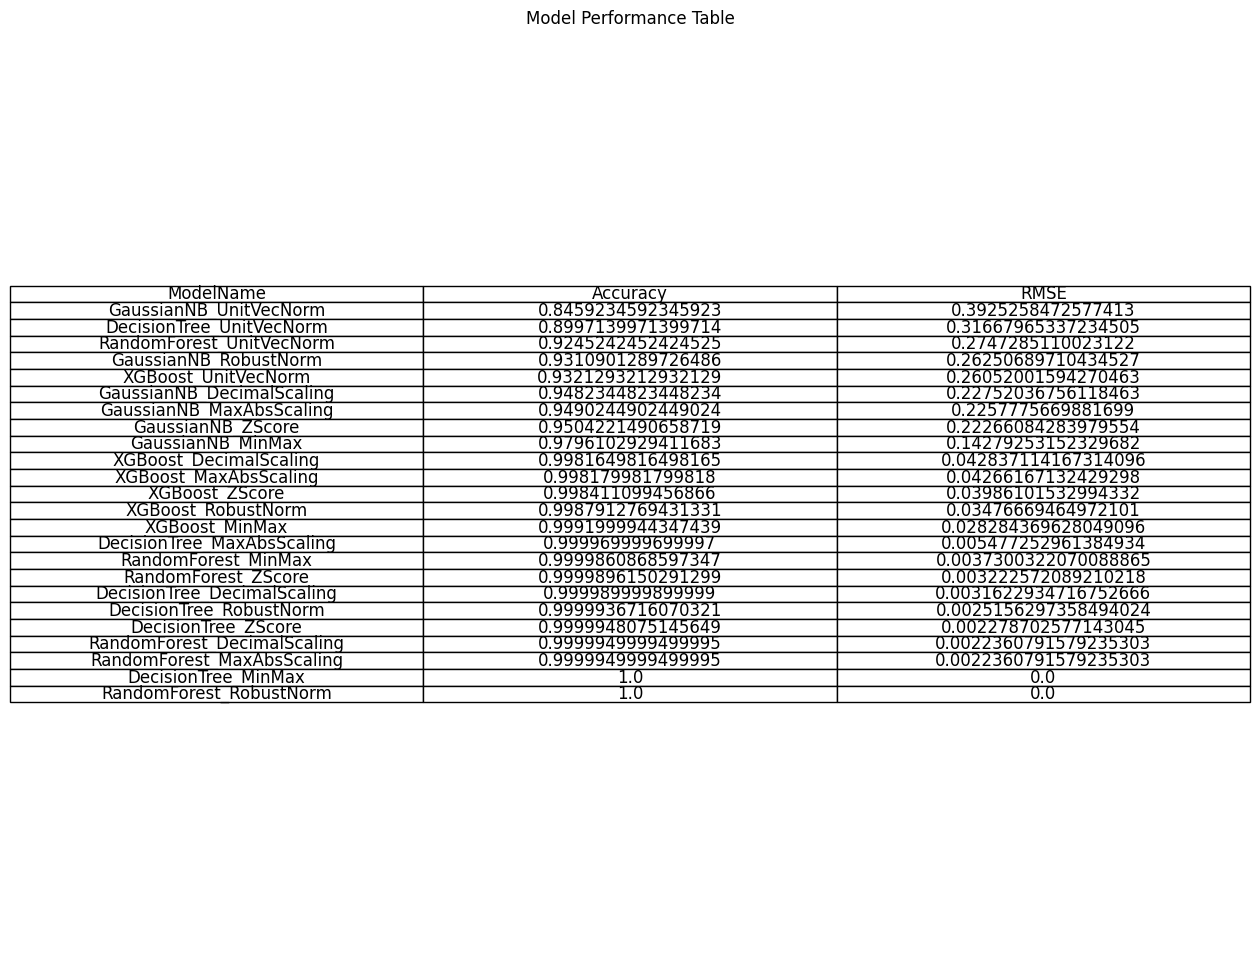

In [ ]:
import matplotlib.pyplot as plt

df_metrics = pd.DataFrame(metrics)

# Arrange the models from lowest to highest accuracy for better visualization.
df_metrics.sort_values(by='Accuracy', inplace=True)

# Create a figure and axis for the table
fig, ax = plt.subplots(figsize=(16, 12))

# Display the table in ascending order of Accuracy
table_data = df_metrics[['ModelName', 'Accuracy', 'RMSE']]
table = ax.table(cellText=table_data.values, colLabels=table_data.columns, cellLoc='center', loc='center')
table.auto_set_font_size(False)
table.set_fontsize(12)

# Remove axes for better visualization
ax.axis('off')

plt.title('Model Performance Table')
plt.show()

From the table above, it is clearly shown that Random Forest Model performed the best with an accuracy of 100% and Root Mean Error Squared of 0 with Robust normalization and Min Max normalization technique. This accuracy is considered exceptionally high and significantly exceeds the assignment's minimum requirement of 75%. Not only that, our Random Forest Model also performed consistently well on other normalization technique, achieving 99.9994% on Z-Score normalization technique.


Even though DecisionTree model with Robust Normalization technique also achieves an accuracy of 100%, Random Forest Model is still our prefered choice since according to the table, in the top 5 most accurate model, 4 out of 5 are Random Forest Model

So we decided to choose Random Forest model as our model for this project


##Fine tuning
After the model is selected and trained, fine tuning techniques such as hyperparameter tuning can be done to improve its performance even more.

##Hyperparameter tuning

In [ ]:
from sklearn.model_selection import GridSearchCV

# Since both robust normalization and min max normalization perform
# as good, we will pick min max as our normalization technique for simplicity
X = df_min_max.copy()
y = X.pop('fraud')

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the model with a random state for reproducability
rf_model = RandomForestClassifier(random_state=42)

# Define the hyperparameters and their values to be tested
param_grid = {
    'max_depth': [10, 20],
    'min_samples_split': [2, 5],
}

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Fit the model to the training data
grid_search.fit(X_train, y_train)

# Print the best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

# Evaluate the best model on the test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
print("Test Accuracy:", accuracy_score(y_test, y_pred))


Fitting 5 folds for each of 4 candidates, totalling 20 fits
Best Parameters: {'max_depth': 10, 'min_samples_split': 2}
Best Score: 0.9999965216786378
Test Accuracy: 1.0


The two hyperparameters found are {'max_depth': 10, 'min_samples_split': 2}

After hyperparameter tuning with Grid Search, the accuracy remain as high as before, at a 100% accuracy.

Even though our model already achieved an accuracy of a 100% without having the need to fine-tune with hyperparameter tuning, we believe it is still a good practice to implement it for learning purposes. As in the future, other tasks that require us to train machine learning models might not be as performant as this one, so fine-tuning is very much needed to improve its performance.

##Conclusion

The model we have chosen is the Random Forest Model, with Min Max normalization technique applied on the dataset, and with the hyperparameters (hyp).
The model achieve an impressive accuracy of (acc) and a Root Mean Squared Error of (rmse).

# 4. **Data Tabulation**


Table 1. Data Properties 1: Types of Data and Data Types

Table 2. Data Properties 2: Statistic

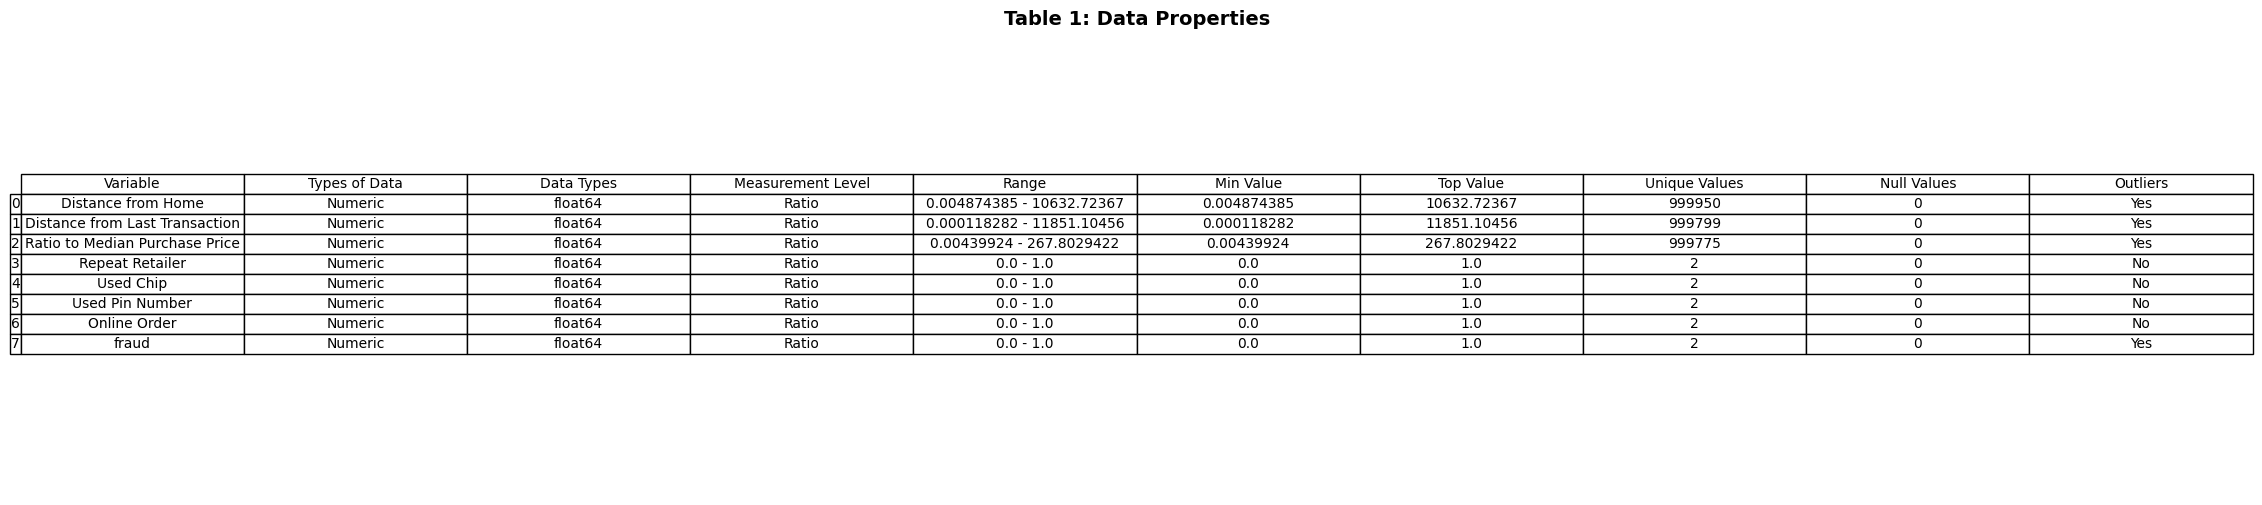

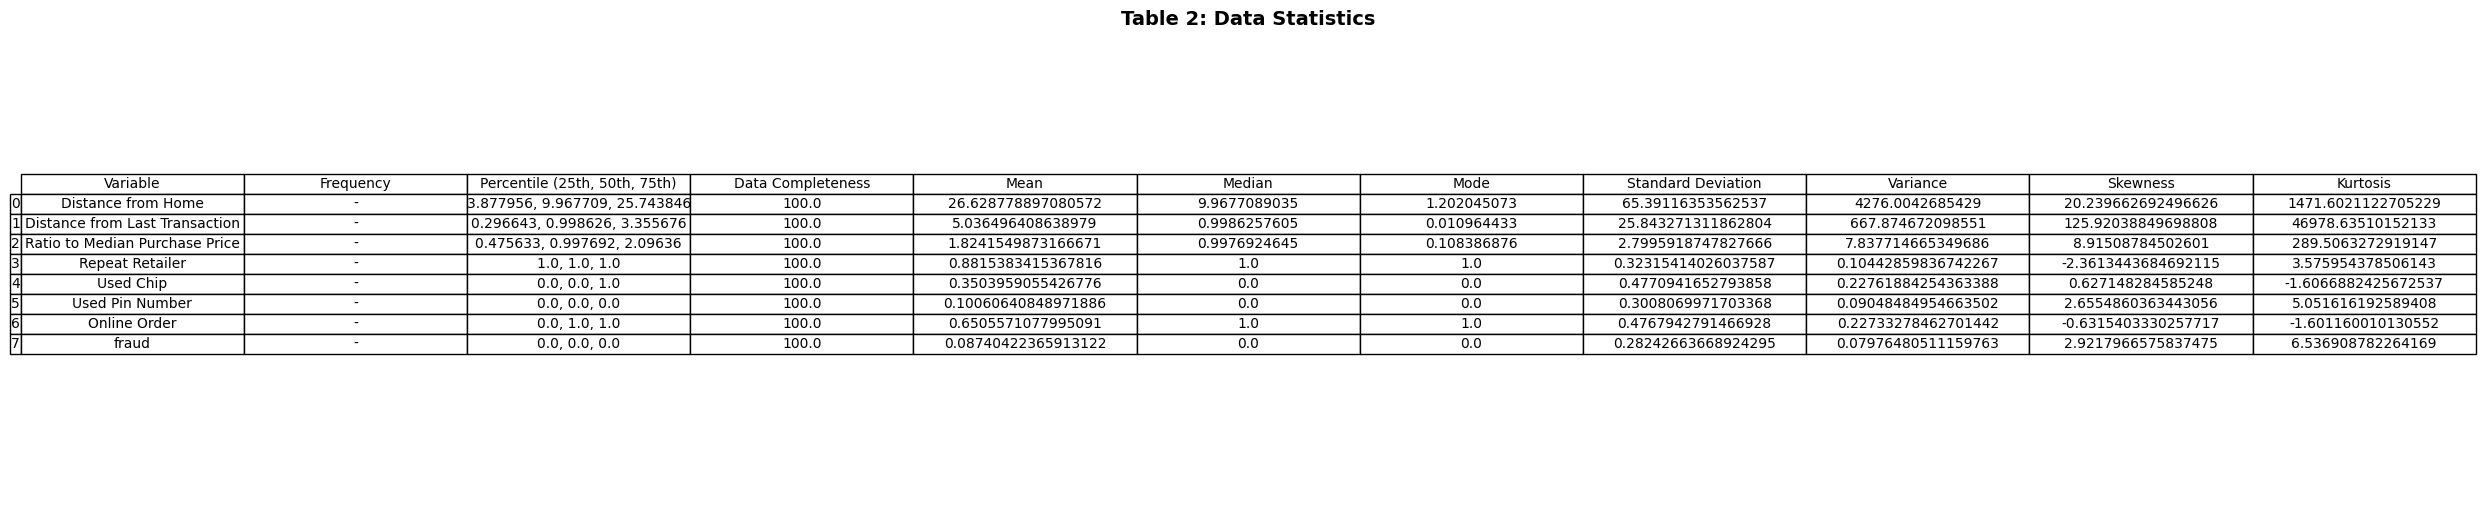

In [ ]:
from pandas.plotting import table

# Table 1: Data Properties
table1 = pd.DataFrame({
    "Variable": df.columns,
    "Types of Data": ["Numeric" if pd.api.types.is_numeric_dtype(df[col]) else "Categorical" for col in df.columns],
    "Data Types": [df[col].dtype for col in df.columns],
    "Measurement Level": ["Ratio" if pd.api.types.is_numeric_dtype(df[col]) else "Nominal" for col in df.columns],
    "Range": [f"{df[col].min()} - {df[col].max()}" if pd.api.types.is_numeric_dtype(df[col]) else "-" for col in df.columns],
    "Min Value": [df[col].min() if pd.api.types.is_numeric_dtype(df[col]) else "-" for col in df.columns],
    "Top Value": [df[col].max() if pd.api.types.is_numeric_dtype(df[col]) else "-" for col in df.columns],
    "Unique Values": [df[col].nunique() for col in df.columns],
    "Null Values": [df[col].isnull().sum() for col in df.columns],
    "Outliers": ["Yes" if pd.api.types.is_numeric_dtype(df[col]) and ((df[col] > (df[col].mean() + 3 * df[col].std())).any() or (df[col] < (df[col].mean() - 3 * df[col].std())).any()) else "No" for col in df.columns]
})

# Table 2: Data Statistics
table2 = pd.DataFrame({
    "Variable": df.columns,
    "Frequency": [df[col].value_counts().to_dict() if not pd.api.types.is_numeric_dtype(df[col]) else "-" for col in df.columns],
    # Round up the percentile valur to 6 decimal places (6 d.p) to fit the value completely into the table
    "Percentile (25th, 50th, 75th)": [
        f"{np.round(np.percentile(df[col].dropna(), 25),6)}, {np.round(np.percentile(df[col].dropna(), 50),6)}, {np.round(np.percentile(df[col].dropna(), 75),6)}"
        if pd.api.types.is_numeric_dtype(df[col]) else "-" for col in df.columns
    ],
    "Data Completeness": [(1 - df[col].isnull().mean()) * 100 for col in df.columns],
    "Mean": [df[col].mean() if pd.api.types.is_numeric_dtype(df[col]) else "-" for col in df.columns],
    "Median": [df[col].median() if pd.api.types.is_numeric_dtype(df[col]) else "-" for col in df.columns],
    "Mode": [df[col].mode().iloc[0] if not df[col].mode().empty else "-" for col in df.columns],
    "Standard Deviation": [df[col].std() if pd.api.types.is_numeric_dtype(df[col]) else "-" for col in df.columns],
    "Variance": [df[col].var() if pd.api.types.is_numeric_dtype(df[col]) else "-" for col in df.columns],
    "Skewness": [df[col].skew() if pd.api.types.is_numeric_dtype(df[col]) else "-" for col in df.columns],
    "Kurtosis": [df[col].kurt() if pd.api.types.is_numeric_dtype(df[col]) else "-" for col in df.columns]
})

# Function to display a styled table
def display_table(dataframe, title):
    fig, ax = plt.subplots(figsize=(12, 6))  # Adjust figure size
    ax.axis('tight')
    ax.axis('off')

    # Add table
    tbl = table(ax, dataframe, loc='center', cellLoc='center', colWidths=[0.2]*len(dataframe.columns))
    tbl.auto_set_font_size(False)
    tbl.set_fontsize(10)
    tbl.scale(1.2, 1.2)  # Adjust scale

    # Add title
    plt.title(title, fontsize=14, weight='bold')

    # Show the table directly
    plt.show()

# Display Table 1 and Table 2
display_table(table1, "Table 1: Data Properties")
display_table(table2, "Table 2: Data Statistics")